In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../clean_dataset/cleaned_demographic_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071698 entries, 0 to 2071697
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [7]:
df.describe()

,pincode,demo_age_5_17,demo_age_17_
count,2.071698e+06,2.071698e+06,2.071698e+06
mean,5.278322e+05,2.347555e+00,2.144703e+01
std,1.972930e+05,1.490356e+01,1.252498e+02
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


In [9]:
print(f"total record: {df.shape[0]}")

total record: 2071698


In [10]:
df.isnull().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

In [11]:
#check state and district value

In [20]:
df["state"].value_counts()

state
Andhra Pradesh                              207740
Tamil Nadu                                  196857
West Bengal                                 169070
Uttar Pradesh                               167889
Maharashtra                                 162242
Karnataka                                   153957
Odisha                                      105935
Kerala                                      105515
Bihar                                        97621
Gujarat                                      96399
Rajasthan                                    89508
Telangana                                    89086
Madhya Pradesh                               76364
Assam                                        62834
Punjab                                       49611
Jharkhand                                    39653
Chhattisgarh                                 35726
Haryana                                      28554
Himachal Pradesh                             28037
Uttarakhand              

In [21]:
df["state"].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu And Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur',
       'Dadra And Nagar Haveli And Daman And Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Andaman And Nicobar Islands', 'Lakshadweep',
       'Chhatisgarh', 'Darbhanga', 'Puttenahalli', 'Balanagar',
       'Uttaranchal', 'Jaipur', 'Madanapalle', 'Nagpur',
       'Raja Annamalai Puram'], dtype=object)

In [24]:
df["state"].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu And Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur',
       'Dadra And Nagar Haveli And Daman And Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Andaman And Nicobar Islands', 'Lakshadweep',
       'Chhatisgarh', 'Darbhanga', 'Puttenahalli', 'Balanagar',
       'Uttaranchal', 'Jaipur', 'Madanapalle', 'Nagpur',
       'Raja Annamalai Puram'], dtype=object)

In [25]:
state_fixes = {
    # Typos & Old Names
    'Chhatisgarh': 'Chhattisgarh',
    'Uttaranchal': 'Uttarakhand',
    
    # Misplaced Cities/Districts -> Correct State
    'Darbhanga': 'Bihar',
    'Jaipur': 'Rajasthan',
    'Nagpur': 'Maharashtra',
    'Madanapalle': 'Andhra Pradesh',
    
    # Localities -> Correct State
    'Puttenahalli': 'Karnataka',          # Bangalore Locality
    'Balanagar': 'Telangana',             # Hyderabad Locality
    'Raja Annamalai Puram': 'Tamil Nadu'  # Chennai Locality
}
df["state"] = df["state"].replace(state_fixes)

In [27]:
df["state"].nunique()

36

In [29]:
df["district"].nunique()

804

In [31]:
district_fixes = {
    'North Dinajpur': 'Uttar Dinajpur',
    'South Dinajpur': 'Dakshin Dinajpur',
    'West Medinipur': 'Paschim Medinipur',
    'East Midnapur': 'Purba Medinipur',
    'Maldah': 'Malda',
    'Hugli': 'Hooghly',
    'South 24 Pargana': 'South 24 Parganas',
    'Baudh': 'Boudh',
    'Khorda': 'Khordha',
    'Palamau': 'Palamu',
    'Mahabub Nagar': 'Mahabubnagar',
    'Karim Nagar': 'Karimnagar',
    'Janjgir Champa': 'Janjgir-Champa',
    'Lahaul And Spiti': 'Lahul And Spiti',
    'S.A.S Nagar': 'S.A.S. Nagar',
    'Davanagere': 'Davangere',
    'Tirupathur': 'Tirupattur',
    'Banas Kantha': 'Banaskantha',
    'Jalore': 'Jalor',
    'Tamulpur District': 'Tamulpur',
    'Balasore': 'Baleshwar',
    'Jajapur': 'Jajpur',
    'Jagatsinghapur': 'Jagatsinghpur',
    'Unknown': 'DELETE',
    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',
    'Nellore': 'Sri Potti Sriramulu Nellore',
    'Cuddapah': 'Y. S. R'
}

In [32]:
df["district"] = df["district"].replace(district_fixes)

In [34]:
df["district"].nunique()

800

In [36]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_18_greater'],
      dtype='object')

In [18]:
df.dtypes

date             object
state            object
district         object
pincode           int64
demo_age_5_17     int64
demo_age_17_      int64
dtype: object

In [35]:
df.rename(columns={"demo_age_17_": "demo_age_18_greater"}, inplace=True)

In [37]:
df['total_changes'] = df['demo_age_5_17'] + df['demo_age_18_greater']

In [38]:
df.head(3)

,date,state,district,pincode,demo_age_5_17,demo_age_18_greater,total_changes
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,578
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,397
2,2025-03-01,Gujarat,Rajkot,360006,65,765,830


In [40]:
df_age_columns = ["demo_age_5_17", "demo_age_18_greater"]
df_age_sum = df[df_age_columns].sum()

In [41]:
df_age_sum

demo_age_5_17           4863424
demo_age_18_greater    44431761
dtype: int64

In [47]:
state_stats_demo = df.groupby('state')[['total_changes'] + df_age_columns].sum().sort_values('total_changes', ascending=False)
top_10_states_demo = state_stats_demo.head(10)

In [48]:
top_10_states_demo

,total_changes,demo_age_5_17,demo_age_18_greater
state,,,
Uttar Pradesh,8542328,790308,7752020
Maharashtra,5054603,273322,4781281
Bihar,4814352,380023,4434329
West Bengal,3872737,242561,3630176
Madhya Pradesh,2912938,407098,2505840
Rajasthan,2817617,257224,2560393
Andhra Pradesh,2295584,321148,1974436
Tamil Nadu,2212229,315638,1896591
Chhattisgarh,2005438,165207,1840231


In [51]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True, format='mixed', errors='coerce')

In [53]:
monthly_trend_demo = df.set_index('date')[['total_changes']].resample('ME').sum()

In [54]:
monthly_trend_demo

,total_changes
date,
2025-03-31,11147558
2025-04-30,1515672
2025-05-31,1566287
2025-06-30,1685562
2025-07-31,2220715
2025-08-31,0
2025-09-30,7324060
2025-10-31,5010966
2025-11-30,9387601


In [56]:
# Print Insights
print("Total Demographic Changes:", df['total_changes'].sum())
print("\nAge Group Split:\n", df_age_sum)
print("\nTop 5 States:\n", top_10_states_demo.head(5))

Total Demographic Changes: 49295185

Age Group Split:
 demo_age_5_17           4863424
demo_age_18_greater    44431761
dtype: int64

Top 5 States:
                 total_changes  demo_age_5_17  demo_age_18_greater
state                                                            
Uttar Pradesh         8542328         790308              7752020
Maharashtra           5054603         273322              4781281
Bihar                 4814352         380023              4434329
West Bengal           3872737         242561              3630176
Madhya Pradesh        2912938         407098              2505840


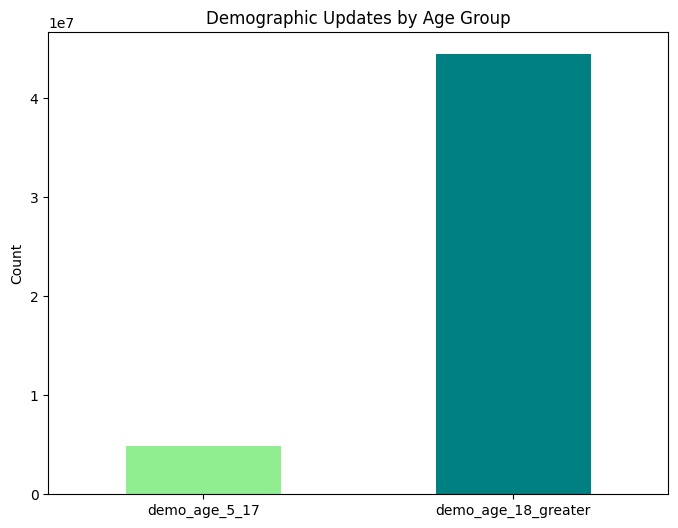

In [64]:
# Plot 1: Age Group
plt.figure(figsize=(8, 6))
df_age_sum.plot(kind='bar', color=['lightgreen', 'teal'])
plt.title('Demographic Updates by Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('demo_age_distribution.png')
plt.show()

C:\Users\ytsub\AppData\Local\Temp\ipykernel_11992\145359614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states_demo['total_changes'], y=top_10_states_demo.index, palette='magma')


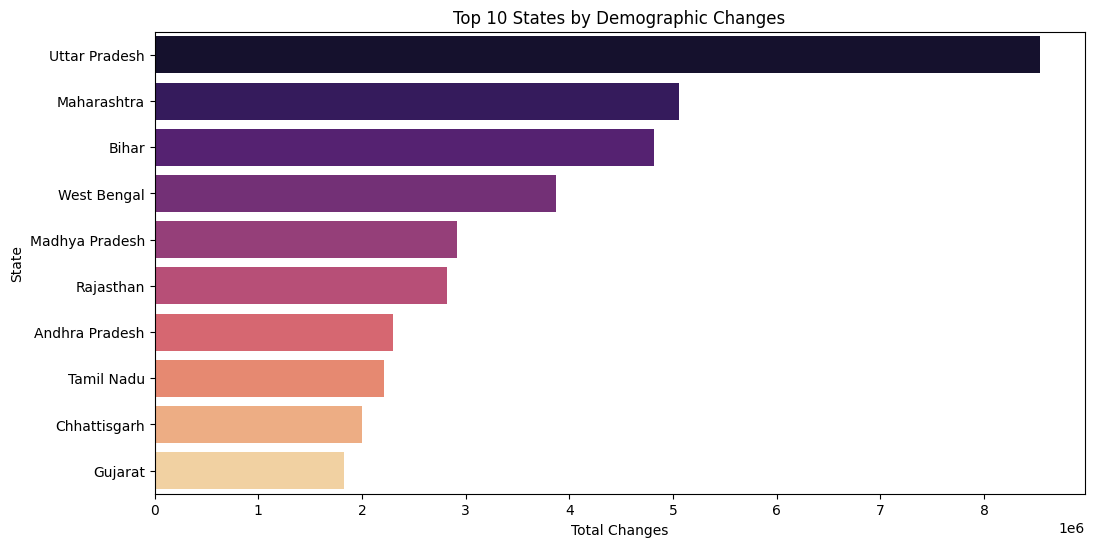

In [65]:
# Plot 2: Top States
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states_demo['total_changes'], y=top_10_states_demo.index, palette='magma')
plt.title('Top 10 States by Demographic Changes')
plt.xlabel('Total Changes')
plt.ylabel('State')
plt.savefig('demo_top_states.png')
plt.show()

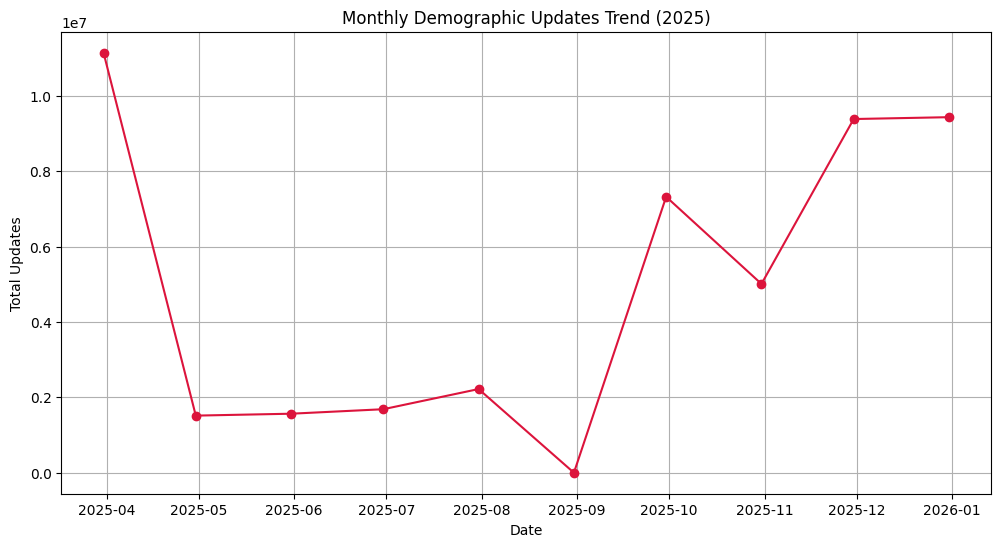

In [67]:
# Plot 3: Monthly Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend_demo.index, monthly_trend_demo['total_changes'], marker='o', color='crimson')
plt.title('Monthly Demographic Updates Trend (2025)')
plt.xlabel('Date')
plt.ylabel('Total Updates')
plt.grid(True)
plt.savefig('demo_monthly_trend.png')
plt.show()